In [2]:
import numpy as np

data = np.load('/content/bounding_box_2d_tight_0007.npy')

print(data)

[(0, 417, 387, 437, 397, 0.5349)]


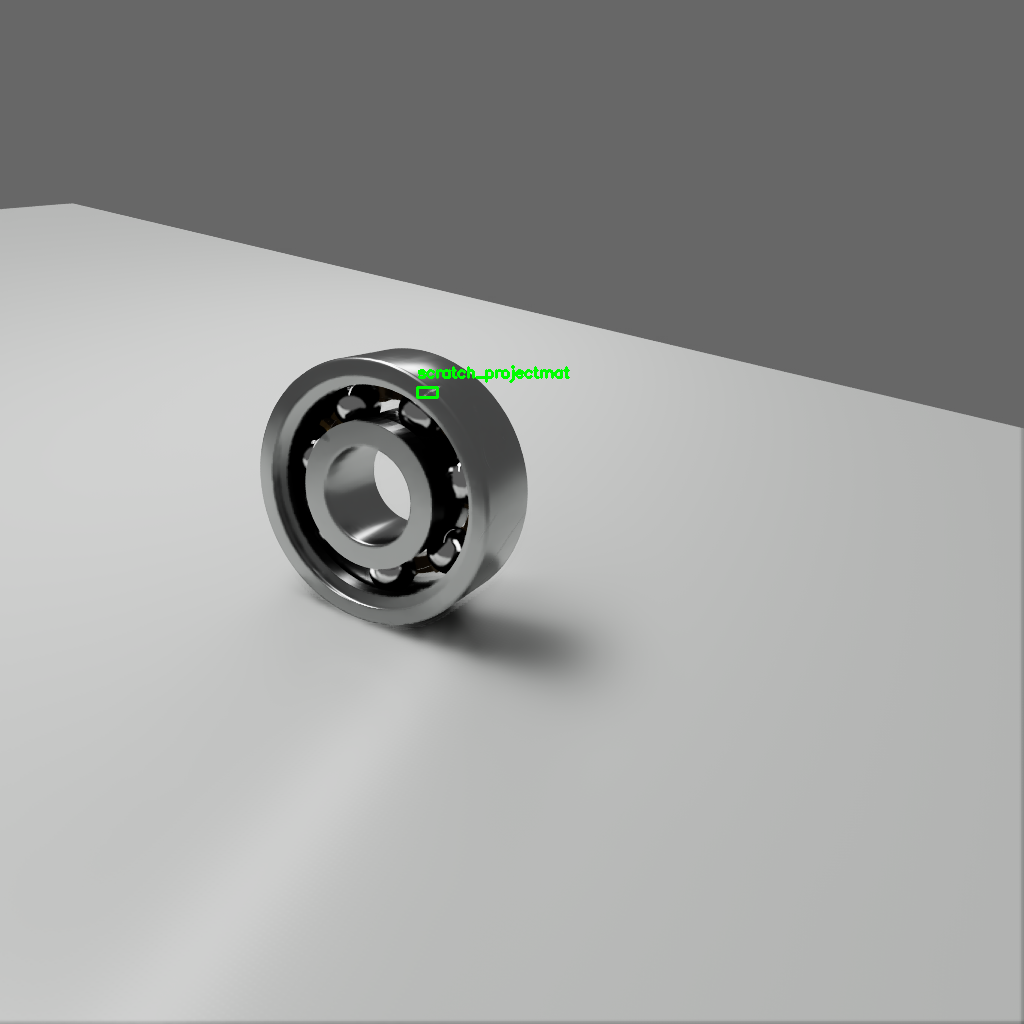

In [12]:
import cv2
import numpy as np
import json
from google.colab.patches import cv2_imshow

def load_bbox_from_npy(file_path):
    return np.load(file_path)

def load_labels_from_json(file_path):
    with open(file_path, 'r') as f:
        label_data = json.load(f)
    labels = []
    for idx in range(len(label_data)):
        labels.append(label_data[str(idx)]['class'])
    return labels

def display_image_with_annotations(image_path, bbox_coordinates, labels):
    image = cv2.imread(image_path)
    for bbox, label in zip(bbox_coordinates, labels):
        _, x1, y1, x2, y2, _ = bbox
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

file_ids = ['0007']

for file_id in file_ids:
    image_path = f'rgb_{file_id}.png'
    bbox_file_path = f'bounding_box_2d_tight_{file_id}.npy'
    label_file_path = f'bounding_box_2d_tight_labels_{file_id}.json'

    bbox_coordinates = load_bbox_from_npy(bbox_file_path)
    labels = load_labels_from_json(label_file_path)

    display_image_with_annotations(image_path, bbox_coordinates, labels)
